In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import unicodedata as ud

In [27]:
#Função para normalizar os nomes dos municípios
teste = "Municípioção França"
def normalize(input_str):
    #remover capitalização
    input_str = input_str.lower()
    #remover espaços brancos
    input_str = input_str.replace(" ", "")
    #normalizar caracteres
    nkfd_form = ud.normalize('NFKD', input_str)
    return u"".join([c for c in nkfd_form if not ud.combining(c)])

print(normalize(teste))

municipiocaofranca


In [29]:
ocupacaoLeitos = pd.read_csv("esus-vepi.LeitoOcupacao_2021.csv")
ocupacaoLeitos.head()

/tmp/ipykernel_1528/2301400418.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ocupacaoLeitos = pd.read_csv("esus-vepi.LeitoOcupacao_2021.csv")


,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,41848,fXMWZc6pYx,2021-11-26T03:00:00.000Z,2796341.0,5.0,0.0,0.0,0.0,0.0,0.0,...,parse-cloud,_User$sDovugxgDt,Minas Gerais,Paraguaçu,Minas Gerais,Paraguaçu,False,False,2020-05-26T19:35:23.592Z,2021-11-26T18:10:30.964Z
1,41850,0EqPcsxOrJ,2021-01-19T03:00:00.000Z,2796341.0,5.0,0.0,0.0,0.0,NaN,NaN,...,parse-cloud,_User$sDovugxgDt,Minas Gerais,Paraguaçu,Minas Gerais,Paraguaçu,False,False,2020-05-26T19:35:59.976Z,2021-01-20T12:40:18.030Z
2,49575,8zTFrSB7ln,2021-01-27T21:00:00.000Z,9126597.0,11.0,0.0,4.0,0.0,NaN,NaN,...,parse-cloud,_User$SGlIuTEBrF,Rio de Janeiro,São Gonçalo,Rio de Janeiro,São Gonçalo,False,False,2020-06-01T14:55:50.697Z,2021-01-28T22:18:29.762Z
3,57550,EGer1oZIdg,2021-01-04T03:00:00.000Z,2283239.0,0.0,9.0,0.0,9.0,NaN,NaN,...,parse-cloud,_User$x0Jh9W3F7R,Rio de Janeiro,Miguel Pereira,Rio de Janeiro,Miguel Pereira,False,False,2020-06-05T12:41:07.063Z,2021-01-05T13:11:40.490Z
4,66881,HuLDbexxWM,2021-01-07T05:00:00.000Z,2001020.0,0.0,0.0,1.0,0.0,NaN,NaN,...,parse-cloud,_User$MMGEGP4sab,Acre,Assis Brasil,Acre,Assis Brasil,False,False,2020-06-11T23:55:49.995Z,2021-01-07T23:25:12.509Z


In [40]:
extrair_dia = lambda x: int(x.split("-")[2].split("T")[0])
extrair_mes = lambda x: int(x.split("-")[1])
extrair_ano = lambda x: int(x.split("-")[0])

teste = ocupacaoLeitos["dataNotificacao"][0]
print(extrair_dia(teste), extrair_mes(teste))

26 11


In [30]:
municipiosCoords = pd.read_csv("municipiosCoords.csv")
municipiosCoords.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [41]:
#dados a serem analisados
header = ["tempoNaUti", "latitude", "longitude", "diaNotificacao", "mesNotificacao"]
data = []

#somente 1000 linhas foram lidas
for i in range(1000):
    municipio = normalize(ocupacaoLeitos["municipioNotificacao"][i])
    if (ocupacaoLeitos["ocupacaoSuspeitoUti"][i] + ocupacaoLeitos["ocupacaoConfirmadoUti"][i]) > 0:
        for j in range(len(municipiosCoords)):
            if municipio == normalize(municipiosCoords["nome"][j]):
                data.append([
                    ocupacaoLeitos["ocupacaoSuspeitoUti"][i] + ocupacaoLeitos["ocupacaoConfirmadoUti"][i],
                    municipiosCoords["latitude"][j],
                    municipiosCoords["longitude"][j],
                    extrair_dia(ocupacaoLeitos["dataNotificacao"][i]),
                    extrair_mes(ocupacaoLeitos["dataNotificacao"][i]),
                ])
                break

In [48]:
processed_data = pd.DataFrame(data, columns=header)

processed_data.head()

,tempoNaUti,latitude,longitude,diaNotificacao,mesNotificacao
0,18.0,-22.45720,-43.4803,4,1
1,14.0,-7.21530,-39.4103,1,3
2,4.0,-5.79068,-35.3257,15,5
3,8.0,-5.79068,-35.3257,17,5
4,9.0,-26.11590,-49.8086,10,1


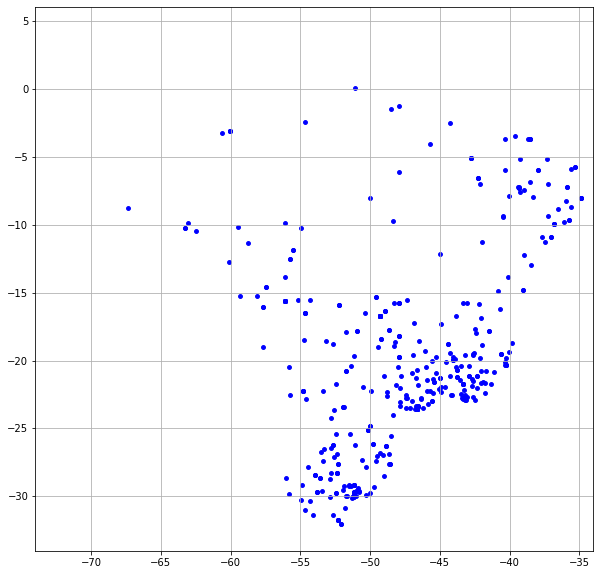

In [70]:
plt.figure(figsize=(10,10))

plt.scatter(processed_data["longitude"], processed_data["latitude"], s=15, c="blue")

plt.xlim(-74, -34)
plt.ylim(-34, 6)
plt.grid()

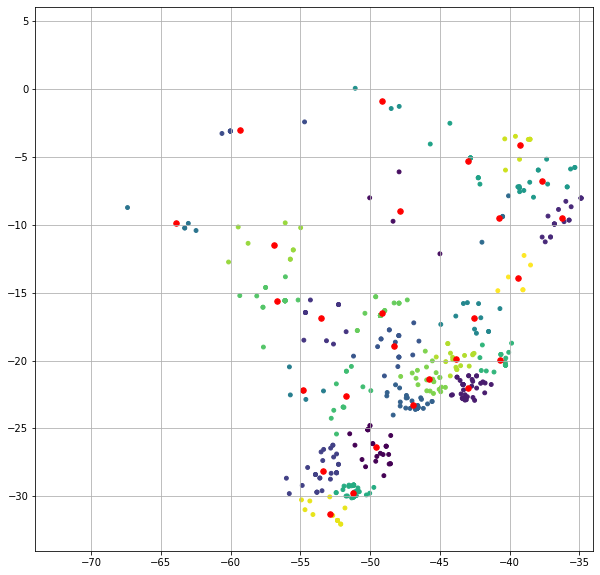

In [69]:
#gerar centroids
kmeans = KMeans(
    n_clusters=27,
    init = 'k-means++', 
    n_init=10, 
    max_iter=300, 
    random_state=0
)
pred_y = kmeans.fit_predict(processed_data[["longitude", "latitude"]])

#plotar centroids e pacientes
plt.figure(figsize=(10,10))

plt.scatter(processed_data["longitude"], processed_data["latitude"], s=15, c=pred_y)

plt.xlim(-74, -34)
plt.ylim(-34, 6)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c="red", label="Centroids")
plt.show()

Os pontos vermelhos no plot acima são centroids determinadas pelo algoritmo kmeans.

Acima, eu escolhi plotar apenas 27, mas poderiam ser mais valores.<br>
Foram usados, para plotar os pacientes e no algoritmo, apenas 1000 casos devido ao tempo de processamento.